In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('656_train.csv')
test = pd.read_csv('656_test.csv')

In [64]:
train.nunique()

RowId                      857409
IntersectionId               2539
Latitude                     4505
Longitude                    4541
EntryStreetName              1707
ExitStreetName               1693
EntryHeading                    8
ExitHeading                     8
Hour                           24
Weekend                         2
Month                           9
Path                        15111
TotalTimeStopped_p20          172
TotalTimeStopped_p40          234
TotalTimeStopped_p50          264
TotalTimeStopped_p60          311
TotalTimeStopped_p80          403
TimeFromFirstStop_p20         239
TimeFromFirstStop_p40         306
TimeFromFirstStop_p50         329
TimeFromFirstStop_p60         351
TimeFromFirstStop_p80         355
DistanceToFirstStop_p20      3479
DistanceToFirstStop_p40      6257
DistanceToFirstStop_p50      7483
DistanceToFirstStop_p60      9495
DistanceToFirstStop_p80     13267
City                            4
dtype: int64

In [3]:
train.shape

(857409, 28)

In [65]:
print(train["City"].unique())
print(test["City"].unique())

['Atlanta' 'Boston' 'Chicago' 'Philadelphia']
['Atlanta' 'Boston' 'Chicago' 'Philadelphia']


In [66]:
# test.groupby(["City"]).apply(np.unique)
test.groupby(["City"]).nunique()

RowId  IntersectionId  Latitude  Longitude  EntryStreetName  \
City                                                                         
Atlanta       344973             468       442        449              350   
Boston        405842            1192      1115       1136              678   
Chicago       295504            2571      2449       2421              508   
Philadelphia  874016            1716      1607       1608              634   

              ExitStreetName  EntryHeading  ExitHeading  Hour  Weekend  Month  \
City                                                                            
Atlanta                  345             8            8    24        2      9   
Boston                   685             8            8    24        2      9   
Chicago                  497             8            8    24        2      8   
Philadelphia             625             8            8    24        2      9   

              Path  City  
City                      
Atlanta       3090     1  
Boston        5725     1  
Chicago       4182     1  
Philadelphia  6882     1

In [67]:
train.isna().sum(axis=0)

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [68]:
test.isna().sum(axis=0)

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19157
ExitStreetName     16340
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [3]:
# %%time
def fill_na(df):
    df['ExitStreetName'] = df.apply(lambda x: x.EntryStreetName if type(x.ExitStreetName) != str else x.ExitStreetName, axis =1)
    df['EntryStreetName'] = df.apply(lambda x: x.ExitStreetName if type(x.EntryStreetName) != str else x.EntryStreetName, axis =1)
    df.fillna('ffill', inplace=True)
    return df
train = fill_na(train)
test = fill_na(test)

In [5]:
train.head()

RowId  IntersectionId  Latitude  Longitude               EntryStreetName  \
0  1920335               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1  1920336               0  33.79166  -84.43003  Marietta Boulevard Northwest   
2  1920337               0  33.79166  -84.43003  Marietta Boulevard Northwest   
3  1920338               0  33.79166  -84.43003  Marietta Boulevard Northwest   
4  1920339               0  33.79166  -84.43003  Marietta Boulevard Northwest   

                 ExitStreetName EntryHeading ExitHeading  Hour  Weekend  ...  \
0  Marietta Boulevard Northwest           NW          NW     0        0  ...   
1  Marietta Boulevard Northwest           SE          SE     0        0  ...   
2  Marietta Boulevard Northwest           NW          NW     1        0  ...   
3  Marietta Boulevard Northwest           SE          SE     1        0  ...   
4  Marietta Boulevard Northwest           NW          NW     2        0  ...   

   TimeFromFirstStop_p40 TimeFromFirstStop_p50  TimeFromFirstStop_p60  \
0                      0                     0                      0   
1                      0                     0                      0   
2                      0                     0                      0   
3                      0                     0                      0   
4                      0                     0                      0   

   TimeFromFirstStop_p80  DistanceToFirstStop_p20  DistanceToFirstStop_p40  \
0                      0                      0.0                      0.0   
1                      0                      0.0                      0.0   
2                      0                      0.0                      0.0   
3                      0                      0.0                      0.0   
4                      0                      0.0                      0.0   

   DistanceToFirstStop_p50  DistanceToFirstStop_p60  DistanceToFirstStop_p80  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

      City  
0  Atlanta  
1  Atlanta  
2  Atlanta  
3  Atlanta  
4  Atlanta  

[5 rows x 28 columns]

### 1. Intersection ID 
Making a new columns of IntersectionId with city name.

In [4]:
# Intersection ID
# Making a new columns of IntersectionId with city name.
train['Intersection'] = train['IntersectionId'].astype(str) + train['City']
test['Intersection'] = test['IntersectionId'].astype(str) + test['City']

In [10]:
train['Intersection']

0                 0Atlanta
1                 0Atlanta
2                 0Atlanta
3                 0Atlanta
4                 0Atlanta
                ...       
857404    1990Philadelphia
857405    1990Philadelphia
857406    1990Philadelphia
857407    1990Philadelphia
857408    1990Philadelphia
Name: Intersection, Length: 857409, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(pd.concat([train['Intersection'], test['Intersection']]).drop_duplicates().values)
train['Intersection'] = le.transform(train['Intersection'])
test['Intersection'] = le.transform(test['Intersection'])


In [73]:
# Check if Intersection ID work
train['Intersection'].value_counts()

3584    2402
426     2364
4005    2124
6021    2065
4021    2052
        ... 
2940       1
2976       1
271        1
2230       1
777        1
Name: Intersection, Length: 4796, dtype: int64

In [74]:
grouped = train.groupby(['IntersectionId','Longitude','Latitude'])
grouped.size()

IntersectionId  Longitude  Latitude
0               -87.77038  41.89843      9
                -84.43003  33.79166    654
                -75.15415  39.97079    383
                -71.07718  42.29174    109
1               -87.76565  41.90214     64
                                      ... 
2868            -87.64280  41.88681      3
2869            -87.69546  41.85191     89
2873            -87.64670  41.85991     32
2874            -87.63986  41.89149     59
2875            -87.63041  41.79091     48
Length: 4796, dtype: int64

### 2. Encoding Street Names

In [6]:
road_encoding = {
"Street":0,
 "St":0,
 "Avenue":1,
 "Ave":1,
 "Boulevard":2,
 "Road":3,
 "Drive":4,
 "Lane":5,
 "Tunnel":6,
 "Highway":7,
 "Way":8,
 "Parkway":9,
 "Parking":10,
 "Oval":11,
 "Square":12,
 "Place":13,
 "Bridge":14}

def encode(x):
    if pd.isna(x):
        return 0
    for road in road_encoding.keys():
        if road in x:
            return road_encoding[road]
        
    return 0

train['EntryType'] = train['EntryStreetName'].apply(encode)
train['ExitType'] = train['ExitStreetName'].apply(encode)
test['EntryType'] = test['EntryStreetName'].apply(encode)
test['ExitType'] = test['ExitStreetName'].apply(encode)

In [7]:
# entering street == exit street?
# 1 means true,0 means false
train["same_street_exact"] = (train["EntryStreetName"] ==  train["ExitStreetName"]).astype(int)
test["same_street_exact"] = (test["EntryStreetName"] ==  test["ExitStreetName"]).astype(int)

### 3. Encoding Cordinal Direction

In [8]:
directions = {
    'N': 0,
    'NE': 1/4,
    'E': 1/2,
    'SE': 3/4,
    'S': 1,
    'SW': 5/4,
    'W': 3/2,
    'NW': 7/4
}
train['EntryHeading'] = train['EntryHeading'].map(directions)
train['ExitHeading'] = train['ExitHeading'].map(directions)

test['EntryHeading'] = test['EntryHeading'].map(directions)
test['ExitHeading'] = test['ExitHeading'].map(directions)
# Calculate the angle of change after entering the Intersection
train['diffHeading'] = train['EntryHeading']-train['ExitHeading']  
test['diffHeading'] = test['EntryHeading']-test['ExitHeading'] 

### 4. Distance from center of city

In [9]:
import math
def add_distance(df):
    
    df_center = pd.DataFrame({"Atlanta":[33.753746, -84.386330],
                             "Boston":[42.361145, -71.057083],
                             "Chicago":[41.881832, -87.623177],
                             "Philadelphia":[39.952583, -75.165222]})
    
    df["CenterDistance"] = df.apply(lambda row: math.sqrt((df_center[row.City][0] - row.Latitude) ** 2 +
                                                          (df_center[row.City][1] - row.Longitude) ** 2) , axis=1)

add_distance(train)
add_distance(test)

### 5. Get city dummies

In [10]:
train = pd.get_dummies(train, columns=['City'])
test = pd.get_dummies(test, columns=['City'])

### 6. Change Cat into Int

In [11]:
le.fit(pd.concat([train['diffHeading'], test['diffHeading']]).drop_duplicates().values)
train['difheading_int'] = le.transform(train['diffHeading'])
test['difheading_int'] = le.transform(test['diffHeading'])

In [76]:
train['Intersection'].value_counts()

3584    2402
426     2364
4005    2124
6021    2065
4021    2052
        ... 
2940       1
2976       1
271        1
2230       1
777        1
Name: Intersection, Length: 4796, dtype: int64

In [75]:
train.columns.values

array(['RowId', 'IntersectionId', 'Latitude', 'Longitude',
       'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading',
       'Hour', 'Weekend', 'Month', 'Path', 'TotalTimeStopped_p20',
       'TotalTimeStopped_p40', 'TotalTimeStopped_p50',
       'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80',
       'Intersection', 'EntryType', 'ExitType', 'same_street_exact',
       'diffHeading', 'CenterDistance', 'City_Atlanta', 'City_Boston',
       'City_Chicago', 'City_Philadelphia', 'difheading_int'],
      dtype=object)

In [18]:
test.columns.values

array(['RowId', 'IntersectionId', 'Latitude', 'Longitude',
       'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading',
       'Hour', 'Weekend', 'Month', 'Path', 'City', 'Intersection',
       'EntryType', 'ExitType', 'same_street_exact', 'diffHeading',
       'CenterDistance'], dtype=object)

In [54]:
train['City_Boston'].isna().sum()

0

In [82]:
train['Hour'].value_counts()

10    50372
11    49924
9     49397
14    49111
13    48461
12    48266
15    47085
8     46394
16    43558
17    40693
7     40098
18    38048
19    34885
20    33274
21    32654
22    31612
6     30725
23    29619
0     25936
1     21597
5     19862
2     17794
3     14214
4     13830
Name: Hour, dtype: int64

### Decision Tree with Parameter Tunning (Baseline)

In [76]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math

start = time.clock()


for i in y_list:
    X_train,X_test,y_train,y_test =train_test_split(x,train[i],test_size=0.2)
    dt = tree.DecisionTreeRegressor()
    dt = dt.fit(x, train[i])
    #print(dt.get_params())

    y_pred = dt.predict(X_test)

    params_dt = {'max_depth':[3,4,5],
                'min_samples_leaf': [0.04, 0.06, 0.08],
                'max_features': [0.3,0.6,0.9]}

    grid_dt = GridSearchCV(estimator = dt,
                          param_grid=params_dt,
                          #scoring=RMSE(y_test,y_pred),
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1)

    grid_dt.fit(x, train[i])
    
    best_hyperparams = grid_dt.best_params_
    print('\nBest hyperparameters for',i,':\n', best_hyperparams)

elapsed = (time.clock() - start)
print("Time used:",elapsed)


Best hyperparameters for TotalTimeStopped_p20 :
 {'max_depth': 5, 'max_features': 0.9, 'min_samples_leaf': 0.04}

Best hyperparameters for TotalTimeStopped_p50 :
 {'max_depth': 4, 'max_features': 0.9, 'min_samples_leaf': 0.04}

Best hyperparameters for TotalTimeStopped_p80 :
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.04}

Best hyperparameters for DistanceToFirstStop_p20 :
 {'max_depth': 5, 'max_features': 0.9, 'min_samples_leaf': 0.04}

Best hyperparameters for DistanceToFirstStop_p50 :
 {'max_depth': 5, 'max_features': 0.9, 'min_samples_leaf': 0.06}

Best hyperparameters for DistanceToFirstStop_p80 :
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.06}
Time used: 249.4544390999945


In [77]:
max_depth_list = [5,4,5,5,5,3]
max_features_list = [0.9,0.9,0.6,0.9,0.9,0.6]
min_samples_leaf_list = [0.04,0.04,0.04,0.04,0.06,0.06]

In [86]:
rmse_dt = []
for a,b,c,d in zip(y_list,max_depth_list,max_features_list,min_samples_leaf_list):
    X_train,X_test,y_train,y_test =train_test_split(x,train[a],test_size=0.2)
    dt = tree.DecisionTreeRegressor(max_depth=b, max_features=c, min_samples_leaf=d)
    dt = dt.fit(x, train[a])
    y_pred = dt.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_dt.append(rmse)
    print('The rmse of prediction is for',a,'is:', rmse)
    
print('\nThe average RMSE is:',sum(rmse_dt)/len(rmse_dt))   

The rmse of prediction is for TotalTimeStopped_p20 is: 7.002454358407771
The rmse of prediction is for TotalTimeStopped_p50 is: 14.960748929393393
The rmse of prediction is for TotalTimeStopped_p80 is: 27.00070249312362
The rmse of prediction is for DistanceToFirstStop_p20 is: 29.006432080743636
The rmse of prediction is for DistanceToFirstStop_p50 is: 71.10166823335553
The rmse of prediction is for DistanceToFirstStop_p80 is: 151.2196438065208

The average RMSE is: 50.04860831692412


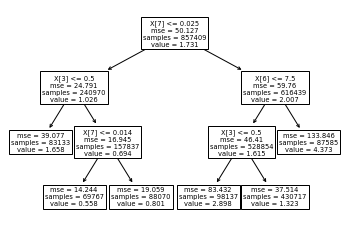

In [75]:
import matplotlib.pyplot as plt
tree.plot_tree(dt.fit(x,train['TotalTimeStopped_p20'] )) 
plt.show()

### Light GBM Regression Model with Parameter Tunning

In [12]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import  make_classification

In [81]:
cat_feat = ['Hour', 'Weekend','Month', 'same_street_exact','difheading_int',
         'City_Atlanta', 'City_Boston', 'City_Chicago', 'City_Philadelphia', 'EntryType', 'ExitType']#, 'Intersection'

for c in cat_feat:
    train[cat_feat] = train[cat_feat].astype('category')
    test[cat_feat] = test[cat_feat].astype('category')

In [82]:
y_list = ['TotalTimeStopped_p20',
       'TotalTimeStopped_p50', 
       'TotalTimeStopped_p80',
         'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p50', 
        'DistanceToFirstStop_p80' ]

x = train[[ 'Hour','Weekend', 'Month',
                 'same_street_exact', 'EntryType',
                    'ExitType', 'difheading_int','CenterDistance',
                    'City_Boston', 'City_Chicago', 'City_Philadelphia', 
                    'City_Atlanta']]#,'Intersection'

In [83]:
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings('ignore')

dtrain = lgb.Dataset(data=x, label=train['TotalTimeStopped_p20'])

# Objective Function
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight, lambda_l1, lambda_l2):
      
        params = {'application':'regression','num_iterations': 450,
                  'learning_rate':0.02,
                  'metric':'rmse'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['lambda_l1'] = lambda_l1
        params['lambda_l2'] = lambda_l2
        
        cv_results = lgb.cv(params, dtrain, nfold=5, seed=17,categorical_feature=cat_feat, stratified=False,
                            verbose_eval =None)
#         print(cv_results)
        return -np.min(cv_results['rmse-mean'])

In [20]:
import time

start = time.clock()


pds = {'num_leaves': (180, 230),
          'feature_fraction': (0.4, 0.8),
          'bagging_fraction': (0.8, 1),
           'lambda_l1': (0,3),
           'lambda_l2': (0,5),
          'max_depth': (8, 15),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (1, 20)
          }
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=12)

elapsed = (time.clock() - start)
print("Time used:",elapsed)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -6.055    |  0.8153   |  0.712    |  1.315    |  3.617    |  14.85    |  11.23    |  0.05061  |  127.9    |
|  2        | -6.111    |  0.8537   |  0.6      |  2.038    |  4.019    |  10.67    |  2.253    |  0.02953  |  220.1    |
|  3        | -6.098    |  0.8427   |  0.5808   |  2.794    |  0.1245   |  12.2     |  19.05    |  0.0238   |  180.3    |
|  4        | -6.158    |  0.9818   |  0.4533   |  1.57     |  3.752    |  12.68    |  9.887    |  0.02128  |  174.0    |
|  5        | -6.106    |  0.8745   |  0.591    |  1.098    |  4.19     |  13.38    |  6.966    |  0.05769  |  150.4    |
|  6        | -5.994    |  0.8      |  0.8      |  0.0      |  5.0      |  15.0     |  20.0     |  0.1      |  230.0    |
|  7        | -6.319    

In [85]:
rmse_list = []
for i in y_list:
    print('\n\nTarget Variable is: ',i)
    x = train[[ 'Hour','Weekend', 'Month',
                 'same_street_exact', 'EntryType',
                    'ExitType', 'difheading_int','CenterDistance',
                    'City_Boston', 'City_Chicago', 'City_Philadelphia', 
                    'City_Atlanta','Intersection']]

    y = train[i]

    X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    

    params = {
        'task': 'train',
        'boosting_type': 'gbdt', 
        'objective': 'regression',
        'metric': {'l2', 'rmse'},  
        'num_leaves': 230,   
        'learning_rate': 0.05,  
        'feature_fraction': 0.8, 
        'bagging_fraction': 0.8, 
        'lambda_l1': 0,
        'lambda_l1': 5,
        'verbose': 1 
    }

    gbm = lgb.train(params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5,categorical_feature=cat_feat)
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

    #gbm = lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05,n_estimators=20,
                           #categorical_feature=cat_feat)
    #gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1')#,early_stopping_rounds=5


    # Model Evaluation
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_list.append(rmse)
    print('The rmse of prediction is:', rmse)
    
print('\n',sum(rmse_list)/len(rmse_list))    

                      



Target Variable is:  TotalTimeStopped_p20
[1]	valid_0's l2: 49.7487	valid_0's rmse: 7.05327
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 49.3495	valid_0's rmse: 7.02492
[3]	valid_0's l2: 49.0206	valid_0's rmse: 7.00147
[4]	valid_0's l2: 48.6996	valid_0's rmse: 6.97851
[5]	valid_0's l2: 48.4449	valid_0's rmse: 6.96024
[6]	valid_0's l2: 48.1414	valid_0's rmse: 6.9384
[7]	valid_0's l2: 47.8916	valid_0's rmse: 6.92037
[8]	valid_0's l2: 47.6565	valid_0's rmse: 6.90337
[9]	valid_0's l2: 47.3014	valid_0's rmse: 6.8776
[10]	valid_0's l2: 47.0638	valid_0's rmse: 6.86031
[11]	valid_0's l2: 46.8995	valid_0's rmse: 6.84832
[12]	valid_0's l2: 46.7516	valid_0's rmse: 6.83751
[13]	valid_0's l2: 46.5131	valid_0's rmse: 6.82005
[14]	valid_0's l2: 46.3166	valid_0's rmse: 6.80563
[15]	valid_0's l2: 46.1334	valid_0's rmse: 6.79216
[16]	valid_0's l2: 46.0321	valid_0's rmse: 6.7847
[17]	valid_0's l2: 45.7601	valid_0's rmse: 6.76462
[18]	valid_0's l2: 45.6645	valid_0's rmse

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),x.columns)), columns=['Value','Feature'])
fea_imp = {'Feature':['Hour', 'Weekend', 'Month',
             'same_street_exact', 'EntryType',
                'ExitType', 'difheading_int','CenterDistance',
                'City_Boston', 'City_Chicago', 'City_Philadelphia', 
                'City_Atlanta','Intersection'], 'Value':[ 205,   57,   45,  216,  352,  219,  437, 1591,   39,   21,   57,
        106, 1235]} 

fea_imp = pd.DataFrame(fea_imp) 
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=fea_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [93]:
gbm.feature_importance()

array([ 205,   57,   45,  216,  352,  219,  437, 1591,   39,   21,   57,
        106, 1235])

In [78]:
'''
x = train[[  'Hour', 'Weekend', 'Month',
             'same_street_exact', 'EntryType',
                'ExitType', 'difheading_int','CenterDistance',
                'City_Boston', 'City_Chicago', 'City_Philadelphia', 
                'City_Atlanta','Intersection']].values

y = train[['TotalTimeStopped_p20',
       'TotalTimeStopped_p40', 
       'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
         'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80' ]]
       '''